In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers,callbacks
import os
import cv2
import glob

In [2]:
path = "Face Mask Dataset/"
os.listdir(path)

['Test', 'Train', 'Validation']

In [3]:
image_path = []
label = []
location = []

for where in os.listdir(path):
    for status in os.listdir(path+"/"+where):
        for image in glob.glob(path+where+"/"+status+"/"+"*.png"):
            image_path.append(image)
            label.append(status)
            location.append(where)
            
data = pd.DataFrame({'image_path':image_path,'label':label,'location':location})
data.head()

,image_path,label,location
0,Face Mask Dataset/Test/WithMask\1163.png,WithMask,Test
1,Face Mask Dataset/Test/WithMask\1174.png,WithMask,Test
2,Face Mask Dataset/Test/WithMask\1175.png,WithMask,Test
3,Face Mask Dataset/Test/WithMask\1203.png,WithMask,Test
4,Face Mask Dataset/Test/WithMask\1361.png,WithMask,Test


In [4]:
train_data =data[data['location']=='Train'].sample(frac=1)
test_data = data[data['location']=='Test'].sample(frac=1)
validation_data = data[data['location']=='Validation'].sample(frac=1)

In [5]:
def plot_images(data):
    for loc in range(3):
        plt.imshow(cv2.imread(data.iloc[loc,0]))
        plt.title(f'{data.iloc[loc,2]}-{data.iloc[loc,1]}')
        plt.show()

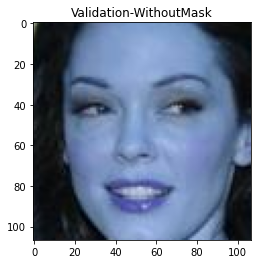

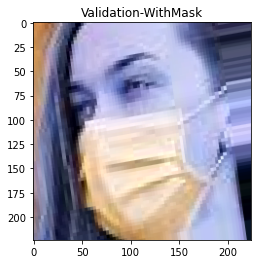

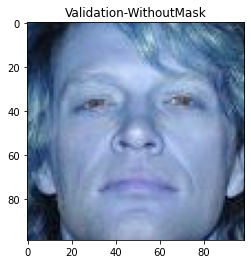

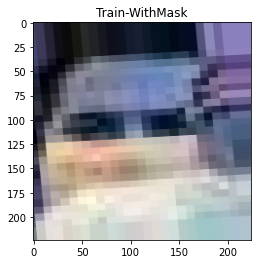

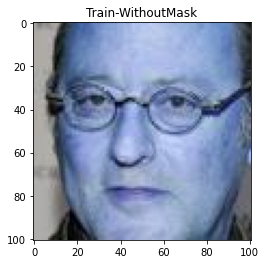

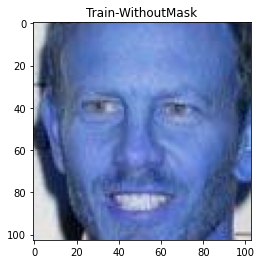

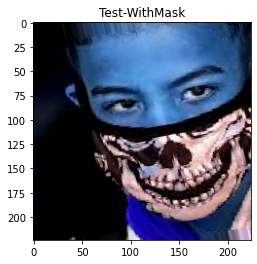

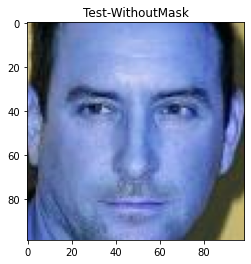

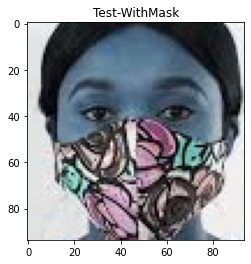

In [6]:
plot_images(validation_data)
plot_images(train_data)
plot_images(test_data)

In [7]:
 def data_preprocessing(input_data):
    input_data = input_data.reset_index().drop("index", axis = 1)
    data = []
    for i in range(len(input_data)):
        img_array = cv2.imread(input_data["image_path"][i], cv2.IMREAD_GRAYSCALE)
        new_image_array = cv2.resize(img_array, (150, 150))
        if input_data["label"][i] == "WithMask":
            data.append([new_image_array, 1])
        else:
            data.append([new_image_array, 0])
    data = np.array(data)
    X = []
    y = []
    for image in data:
        X.append(image[0])
        y.append(image[1])
    X = np.array(X)
    X = X/255
    X = X.reshape(len(X),X.shape[1],X.shape[2], 1)
    y = np.array(y)
    return [X,y]

In [8]:
Train_data = data_preprocessing(train_data)[0]
Train_labels = data_preprocessing(train_data)[1]
Validation_data = data_preprocessing(validation_data)[0]
Validation_labels = data_preprocessing(validation_data)[1]

C:\Users\moham\AppData\Local\Temp/ipykernel_12708/3046721739.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


In [9]:
Train_data.shape,Train_labels.shape


((10000, 150, 150, 1), (10000,))

In [10]:
Train_labels[:4]

array([1, 0, 0, 1])

In [11]:
model = keras.Sequential([
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.BatchNormalization(renorm=True),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.BatchNormalization(renorm=True),
    layers.Conv2D(256,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.BatchNormalization(renorm=True),
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [12]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['binary_accuracy'])

In [13]:
#early_stopppings = callbacks.EarlyStopping(min_delta=0.001,patience=3,restore_best_weights=True)
model.fit(Train_data,Train_labels,validation_data=(Validation_data,Validation_labels),
                    batch_size = 45, epochs=5)#,callbacks=[early_stopppings],verbose=0)


Epoch 1/5
223/223 [==============================] - 27s 86ms/step - loss: 7.0326 - binary_accuracy: 0.8237 - val_loss: 1.9573 - val_binary_accuracy: 0.9563
Epoch 2/5
223/223 [==============================] - 19s 84ms/step - loss: 2.2981 - binary_accuracy: 0.9478 - val_loss: 0.9288 - val_binary_accuracy: 0.9638
Epoch 3/5
223/223 [==============================] - 22s 96ms/step - loss: 1.8804 - binary_accuracy: 0.9563 - val_loss: 0.3863 - val_binary_accuracy: 0.9862
Epoch 4/5
223/223 [==============================] - 22s 98ms/step - loss: 0.4040 - binary_accuracy: 0.9800 - val_loss: 0.5209 - val_binary_accuracy: 0.9650
Epoch 5/5
223/223 [==============================] - 42s 187ms/step - loss: 0.1968 - binary_accuracy: 0.9867 - val_loss: 0.4302 - val_binary_accuracy: 0.9800


In [14]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 74, 74, 64)       448       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                        

In [15]:
Test_data = data_preprocessing(test_data)[0]
Test_labels = data_preprocessing(test_data)[1]
test_loss,test_acc = model.evaluate(Test_data,Test_labels)
print('Test Accuracy:', test_acc)

C:\Users\moham\AppData\Local\Temp/ipykernel_12708/3046721739.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


31/31 [==============================] - 1s 19ms/step - loss: 0.2906 - binary_accuracy: 0.9808
Test Accuracy: 0.9808467626571655


In [17]:
model.save("Mask_Detection.h5")